In [28]:
%pip install keras
%pip install tensorflow
import keras
import os
from keras.models import *
from keras.layers import *
from keras.datasets import cifar10
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.utils import *
from keras.applications.vgg16 import VGG16
%pip install image_dataset_loader
from image_dataset_loader import load

# train_data_dir = os.path.dirname("output_path/train/Resize")
# validation_data_dir = os.path.dirname("output_path/val/Resize")

train_data_dir = os.path.dirname("output_path/train/")
validation_data_dir = os.path.dirname("output_path/val/")
test_data_dir = os.path.dirname("output_path/test/")

You should consider upgrading via the 'c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:

img_width, img_height = 220, 380
batch_size = 28

datagenerate = ImageDataGenerator(rescale=1.0/255)
                                
train_generator = datagenerate.flow_from_directory(train_data_dir,
                                                target_size=(img_width,img_height),
                                                 batch_size=batch_size,
                                                 #subset="training",
                                                 class_mode='categorical')

validation_generator = datagenerate.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width,img_height),
                                                        batch_size=batch_size,
                                                        #subset="validation",
                                                        class_mode='categorical')

test_generator = datagenerate.flow_from_directory(test_data_dir,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size,
                                                #subset="validation",
                                                class_mode='categorical')
print(train_generator)
print(validation_generator)
print(test_generator)

Found 864 images belonging to 8 classes.
Found 107 images belonging to 8 classes.
Found 109 images belonging to 8 classes.


In [5]:
def define_VGGmodel():
    model = VGG16(include_top=False, input_shape=(img_width, img_height, 3))
    for layer in model.layers:
        layer.trainable = False
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(8, activation='softmax')(class1)
    model = Model(inputs=model.inputs, outputs=output)
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

model = define_VGGmodel()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 220, 380, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 220, 380, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 220, 380, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 110, 190, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 110, 190, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 110, 190, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 55, 95, 128)       0     

c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [154]:
# from keras import models
# from keras import layers

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_width, img_height, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# # add classifier (dense layers)
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(7, activation='softmax'))
# # compile model
# opt = SGD(lr=0.01, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 220, 380, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 190, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 110, 190, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 55, 95, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 55, 95, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 27, 47, 128)     

In [6]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [7]:
# %pip install History
# from keras.callbacks import History
# history = History()
history = model.fit(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator, validation_steps=len(validation_generator), epochs=40, verbose=1, shuffle=False, callbacks=[earlystopping])


Epoch 1/40
31/31 [==============================] - 150s 5s/step - loss: 2.1552 - categorical_accuracy: 0.1759 - val_loss: 2.0614 - val_categorical_accuracy: 0.1682
Epoch 2/40
31/31 [==============================] - 141s 5s/step - loss: 1.9564 - categorical_accuracy: 0.2697 - val_loss: 1.8792 - val_categorical_accuracy: 0.2430
Epoch 3/40
31/31 [==============================] - 142s 5s/step - loss: 1.7725 - categorical_accuracy: 0.3715 - val_loss: 1.7334 - val_categorical_accuracy: 0.3738
Epoch 4/40
31/31 [==============================] - 140s 5s/step - loss: 1.6401 - categorical_accuracy: 0.4178 - val_loss: 1.6333 - val_categorical_accuracy: 0.4579
Epoch 5/40
31/31 [==============================] - 138s 4s/step - loss: 1.5064 - categorical_accuracy: 0.5104 - val_loss: 1.5609 - val_categorical_accuracy: 0.3738
Epoch 6/40
31/31 [==============================] - 144s 5s/step - loss: 1.4798 - categorical_accuracy: 0.4722 - val_loss: 1.4797 - val_categorical_accuracy: 0.5047
Epoch 7/40

{'loss': [2.155233144760132, 1.9564160108566284, 1.772536277770996, 1.6401087045669556, 1.5064383745193481, 1.479783535003662, 1.361099123954773, 1.1873022317886353, 1.0907942056655884, 0.9702582359313965, 0.8771412968635559, 0.7853153347969055, 0.7040719389915466, 0.707699716091156, 0.6443704962730408, 0.5217830538749695, 0.46424826979637146, 0.42620113492012024, 0.3569166362285614, 0.36544397473335266, 0.4346792697906494, 0.32087332010269165, 0.2570692300796509, 0.2595384418964386, 0.2793387472629547, 0.21727196872234344, 0.28950241208076477, 0.23019473254680634, 0.16324463486671448, 0.15589554607868195, 0.14830128848552704, 0.1557796746492386, 0.12189294397830963, 0.11676907539367676, 0.1052248552441597, 0.09870125353336334, 0.09474081546068192, 0.09024429321289062, 0.08081010729074478, 0.08844489604234695], 'categorical_accuracy': [0.17592592537403107, 0.26967594027519226, 0.3715277910232544, 0.41782405972480774, 0.5104166865348816, 0.4722222089767456, 0.5625, 0.6504629850387573, 0

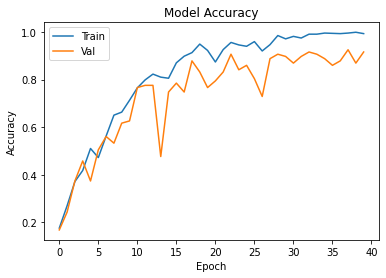

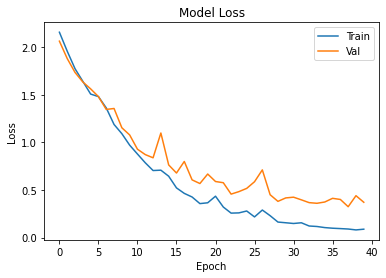

In [8]:
print(history.history)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [23]:
#model.save('classifier_train-99.3_val-91.6_test-88.99%')

INFO:tensorflow:Assets written to: classifier_train-99.3_val-91.6_test-88.99%\assets


INFO:tensorflow:Assets written to: classifier_train-99.3_val-91.6_test-88.99%\assets


In [22]:
print('Validation image - evaluation')

_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('accuracy score: ', acc*100 )

Validation image - evaluation
4/4 [==============================] - 17s 4s/step - loss: 0.3709 - categorical_accuracy: 0.9159
accuracy score:  91.58878326416016


In [16]:
print('Test image - evaluation')
_, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('accuracy score: ', acc*100 )

Test image - evaluation
4/4 [==============================] - 18s 4s/step - loss: 0.3477 - categorical_accuracy: 0.8899
accuracy score:  88.99082541465759


In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('accuracy: ', metrics.accuracy_score(y_pred, test_generator.classes))

4/4 [==============================] - 18s 4s/step
accuracy:  0.11926605504587157


In [27]:
print('Confusion Matrix')
print(confusion_matrix(y_pred, test_generator.classes))


Confusion Matrix
[[0 4 1 0 1 5 2 0]
 [3 2 2 1 2 2 3 3]
 [0 2 2 2 0 1 3 1]
 [1 1 0 0 0 2 1 3]
 [3 0 0 0 2 0 1 2]
 [2 2 2 1 0 3 3 2]
 [1 4 3 0 2 3 2 1]
 [4 3 2 2 2 2 3 2]]


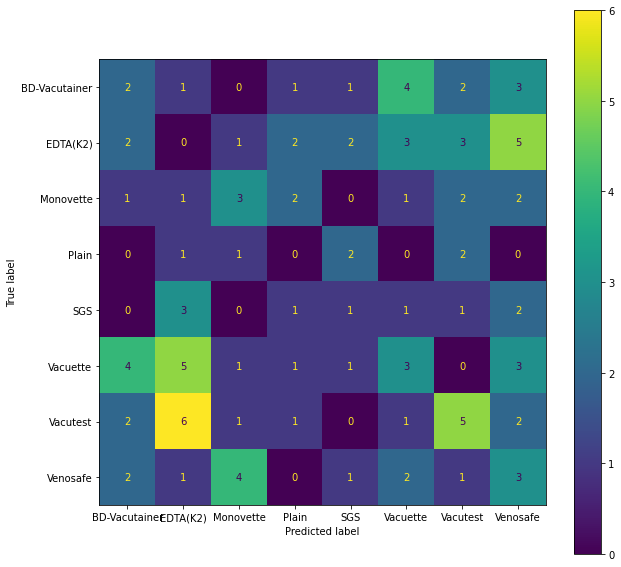

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_generator.classes, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'Plain','SGS', 'Vacuette' , 'Vacutest', 'Venosafe'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmd.plot(ax=ax)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy Score :', accuracy_score(test_generator.labels, y_pred)) 
print ('Report : ')
target_names = ['BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'Plain', 'SGS', 'Vacuette' , 'Vacutest', 'Venosafe']
print (classification_report(test_generator.labels,y_pred, target_names=target_names)) 

Accuracy Score : 0.1559633027522936
Report : 
               precision    recall  f1-score   support

BD-Vacutainer       0.15      0.14      0.15        14
     EDTA(K2)       0.00      0.00      0.00        18
    Monovette       0.27      0.25      0.26        12
        Plain       0.00      0.00      0.00         6
          SGS       0.12      0.11      0.12         9
     Vacuette       0.20      0.17      0.18        18
     Vacutest       0.31      0.28      0.29        18
     Venosafe       0.15      0.21      0.18        14

     accuracy                           0.16       109
    macro avg       0.15      0.15      0.15       109
 weighted avg       0.16      0.16      0.16       109

